In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from PIL import Image,ImageFilter,ImageOps
import os, os.path
from collections import Counter
import re
import nltk
nltk.download('punkt')

employees = pd.read_csv("data/employees.csv",delimiter=",")

file1 = open("data/texts.txt", "r")
text = file1.read()

imgs = []
path = "data/pictures"
valid_images = [".webp",".jpg",".png"]

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RoscaMitrut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


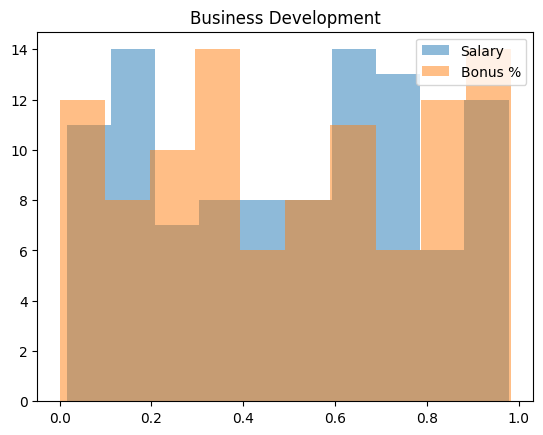

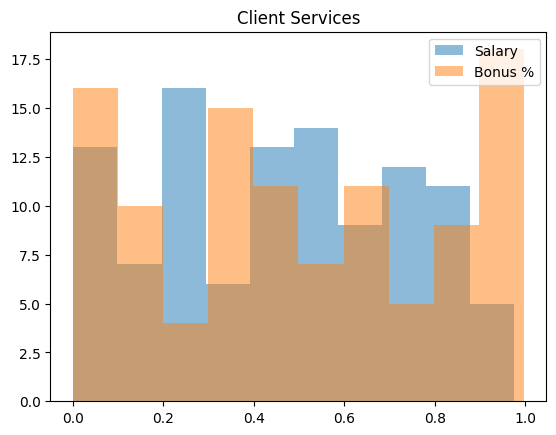

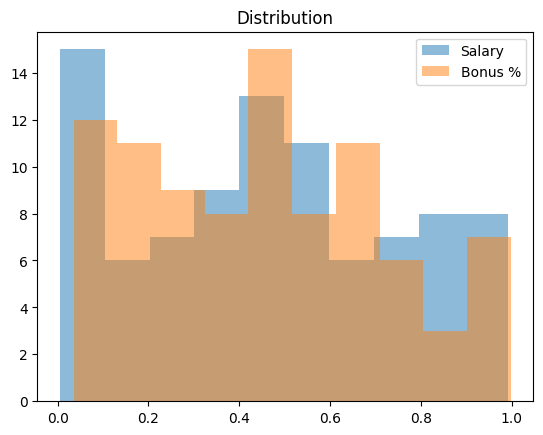

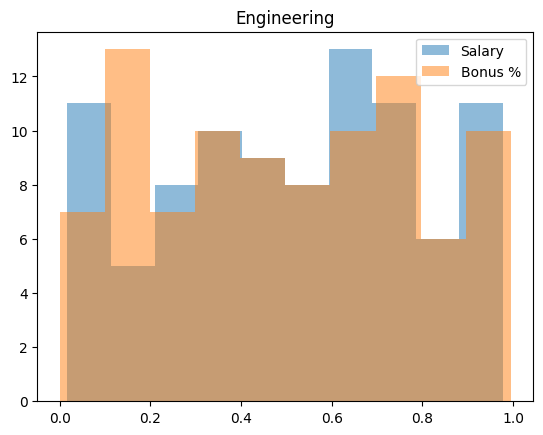

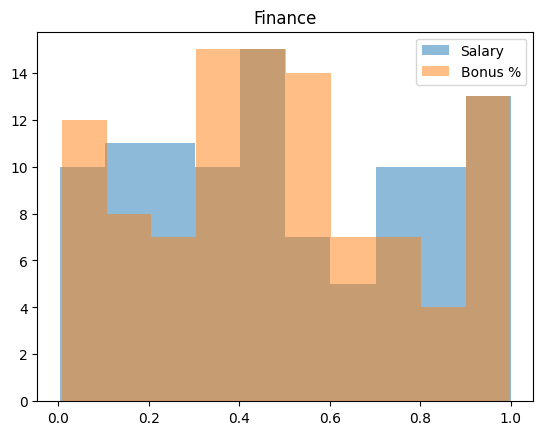

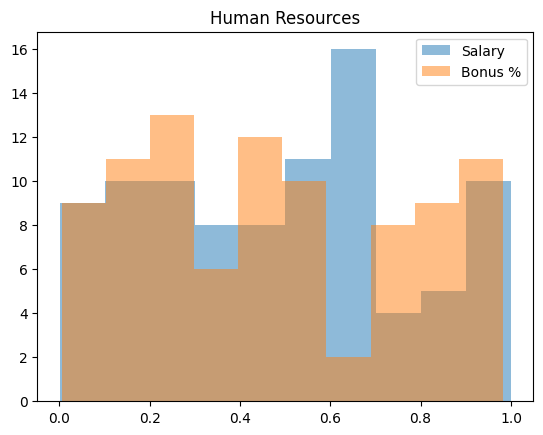

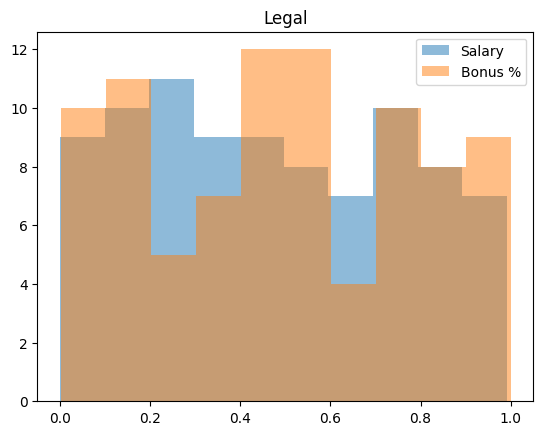

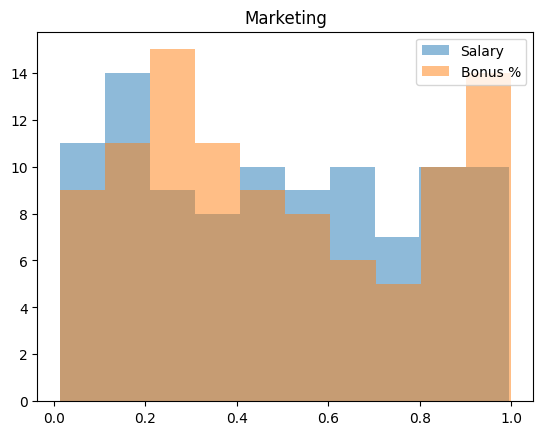

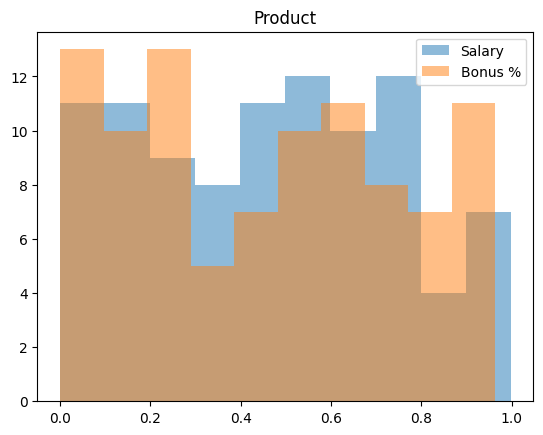

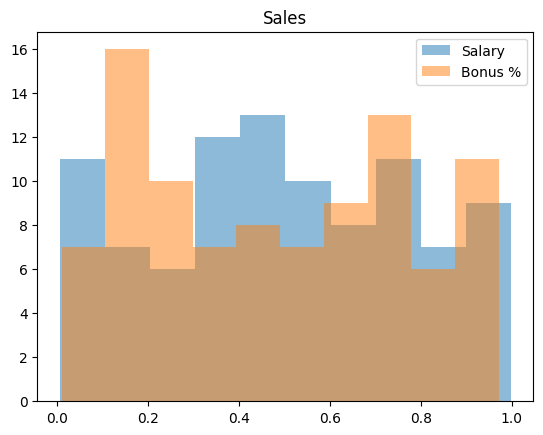

In [5]:
#problema 1 - salariul, bonusul, echipa
salarii = employees["Salary"].tolist()
salarii_noi = [(s - min(salarii))/(max(salarii)-min(salarii)) for s in salarii]

bonusuri = employees["Bonus %"].tolist()
bonusuri_noi = [(b-min(bonusuri))/(max(bonusuri)-min(bonusuri))for b in bonusuri]

employees["NewSalary"] = salarii_noi
employees["NewBonus"] = bonusuri_noi

for title, group in employees.drop(["Salary"],axis=1).groupby('Team'):
    plt.hist(group["NewSalary"],alpha=0.5,label="Salary")
    plt.hist(group["NewBonus"],alpha=0.5,label="Bonus %")
    plt.legend(loc="upper right")
    plt.title(title)
    plt.show()

[[[0.18431373 0.20784314 0.60392157]
  [0.18431373 0.20784314 0.60392157]
  [0.18823529 0.21568627 0.60784314]
  ...
  [0.11372549 0.19607843 0.29411765]
  [0.11372549 0.19607843 0.29411765]
  [0.11372549 0.19607843 0.29411765]]

 [[0.18431373 0.20784314 0.60392157]
  [0.18431373 0.20784314 0.60392157]
  [0.18823529 0.21568627 0.60784314]
  ...
  [0.11372549 0.19607843 0.29411765]
  [0.11372549 0.19607843 0.29411765]
  [0.11372549 0.19607843 0.29411765]]

 [[0.18431373 0.20784314 0.60392157]
  [0.18431373 0.20784314 0.60392157]
  [0.18823529 0.21568627 0.60784314]
  ...
  [0.11372549 0.19607843 0.29411765]
  [0.11372549 0.19607843 0.29411765]
  [0.11372549 0.19607843 0.29411765]]

 ...

 [[0.24313725 0.34117647 0.72941176]
  [0.24313725 0.34117647 0.72941176]
  [0.24313725 0.34117647 0.72941176]
  ...
  [0.09019608 0.15294118 0.53333333]
  [0.08235294 0.15686275 0.53333333]
  [0.07843137 0.16078431 0.53333333]]

 [[0.24313725 0.34117647 0.72941176]
  [0.24313725 0.34117647 0.72941176]


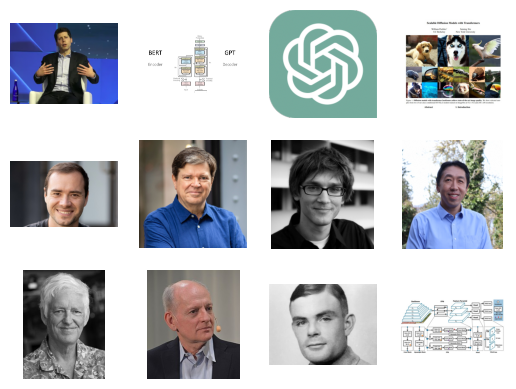

In [6]:
#problema 2 - valorile pixelilor din imagini
def normalizare(image):
    image_array = np.array(image)
    normalized_image = image_array / 255.0
    return normalized_image

normalizate = []
for img in imgs:
  normalizate.append(normalizare(img))

fig = plt.figure()
rows=3
columns=4
i=0
for image in normalizate:
    i+=1
    fig.add_subplot(rows,columns,i)
    plt.imshow(image, cmap='gray')
    plt.axis("off")
    print(image)


In [7]:
#problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.
def normalize(sentence):
    words = re.findall(r'\b\w+\b', sentence.lower())
    word_counts = Counter(words)
    normalized_word_counts = {word:math.log(count) for word,count in word_counts.items()}
    #max_frequency = max(word_counts.values())
    #normalized_word_counts = {word: count / max_frequency for word, count in word_counts.items()}
    normalized_sentence = '   '.join([word + ':' + str(freq) for word, freq in normalized_word_counts.items()])
    return normalized_sentence

for sentence in nltk.sent_tokenize(text):
  normalized_sentence = normalize(sentence)
  print("Normalized sentence:", normalized_sentence)


Normalized sentence: mesaj:0.0   de:0.6931471805599453   informare:0.0   cursul:0.0   și:0.0   laboratoarele:0.0   inteligență:0.0   artificială:0.0   vor:0.0   fi:0.0   o:0.0   provocare:0.0   pentru:0.0   toți:0.0
Normalized sentence: suntem:0.0   convinși:0.0   că:0.0   veți:0.0   realiza:0.0   proiecte:0.0   foarte:0.0   interesante:0.0
Normalized sentence: vă:0.0   încurajăm:0.0   să:0.0   adresați:0.0   întrebări:0.0   atunci:0.0   când:0.0   ceva:0.0   nu:0.0   e:0.0   clar:0.0   atât:0.0   în:0.0   mod:0.0   live:0.0   cât:0.0   și:0.0   folosind:0.0   platforma:0.0   teams:0.0   canalul:0.0   general:0.0
Normalized sentence: dacă:0.0   ați:0.0   citit:0.6931471805599453   până:0.0   aici:0.0   vă:0.0   rugăm:0.0   să:0.0   lăsați:0.0   un:0.0   mesaj:0.0   pe:0.0   canalul:0.0   general:0.0   cu:0.0   textul:0.6931471805599453   am:0.0   pentru:0.0   problema:0.0   3:0.0
Normalized sentence: mesaj:0.0   de:1.0986122886681098   informare:0.0   generat:0.0   chatgpt:0.0   stimaț